<a href="https://colab.research.google.com/github/viniciusgomesbatista/MaterialsSience/blob/main/An%C3%A1lise_de_Concreto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive') 

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Estudos/Pós Graduação/concrete_data.csv', delimiter=',')

In [ ]:
df.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [ ]:
df.columns

Index(['Cement', 'Blast Furnace Slag', 'Fly Ash', 'Water', 'Superplasticizer',
       'Coarse Aggregate', 'Fine Aggregate', 'Age', 'Strength'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Cement              1030 non-null   float64
 1   Blast Furnace Slag  1030 non-null   float64
 2   Fly Ash             1030 non-null   float64
 3   Water               1030 non-null   float64
 4   Superplasticizer    1030 non-null   float64
 5   Coarse Aggregate    1030 non-null   float64
 6   Fine Aggregate      1030 non-null   float64
 7   Age                 1030 non-null   int64  
 8   Strength            1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


In [ ]:
df.describe()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


In [ ]:
df.corr()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
Cement,1.000000,-0.275216,-0.397467,-0.081587,0.092386,-0.109349,-0.222718,0.081946,0.497832
Blast Furnace Slag,-0.275216,1.000000,-0.323580,0.107252,0.043270,-0.283999,-0.281603,-0.044246,0.134829
Fly Ash,-0.397467,-0.323580,1.000000,-0.256984,0.377503,-0.009961,0.079108,-0.154371,-0.105755
Water,-0.081587,0.107252,-0.256984,1.000000,-0.657533,-0.182294,-0.450661,0.277618,-0.289633
Superplasticizer,0.092386,0.043270,0.377503,-0.657533,1.000000,-0.265999,0.222691,-0.192700,0.366079
Coarse Aggregate,-0.109349,-0.283999,-0.009961,-0.182294,-0.265999,1.000000,-0.178481,-0.003016,-0.164935
Fine Aggregate,-0.222718,-0.281603,0.079108,-0.450661,0.222691,-0.178481,1.000000,-0.156095,-0.167241
Age,0.081946,-0.044246,-0.154371,0.277618,-0.192700,-0.003016,-0.156095,1.000000,0.328873
Strength,0.497832,0.134829,-0.105755,-0.289633,0.366079,-0.164935,-0.167241,0.328873,1.000000


In [ ]:
#Renomeando colunas
df.rename({'Cement (component 1)(kg in a m^3 mixture)' : 'Cement' , 'Blast Furnace Slag (component 2)(kg in a m^3 mixture)' :  'Blast' , 'Fly Ash (component 3)(kg in a m^3 mixture)' :  'Fly', 'Water  (component 4)(kg in a m^3 mixture)' : 'Water' , 'Superplasticizer (component 5)(kg in a m^3 mixture)' : 'Plast', 'Coarse Aggregate  (component 6)(kg in a m^3 mixture)' : 'Coarse', 'Fine Aggregate (component 7)(kg in a m^3 mixture)' : 'Fine' , 'Age (day)' : 'Age', "Concrete compressive strength(MPa, megapascals) " : "MPa"}, axis = 1 , inplace = True)

In [ ]:
df.columns

Index(['Cement', 'Blast Furnace Slag', 'Fly Ash', 'Water', 'Superplasticizer',
       'Coarse Aggregate', 'Fine Aggregate', 'Age', 'Strength'],
      dtype='object')

<Figure size 1080x576 with 0 Axes>

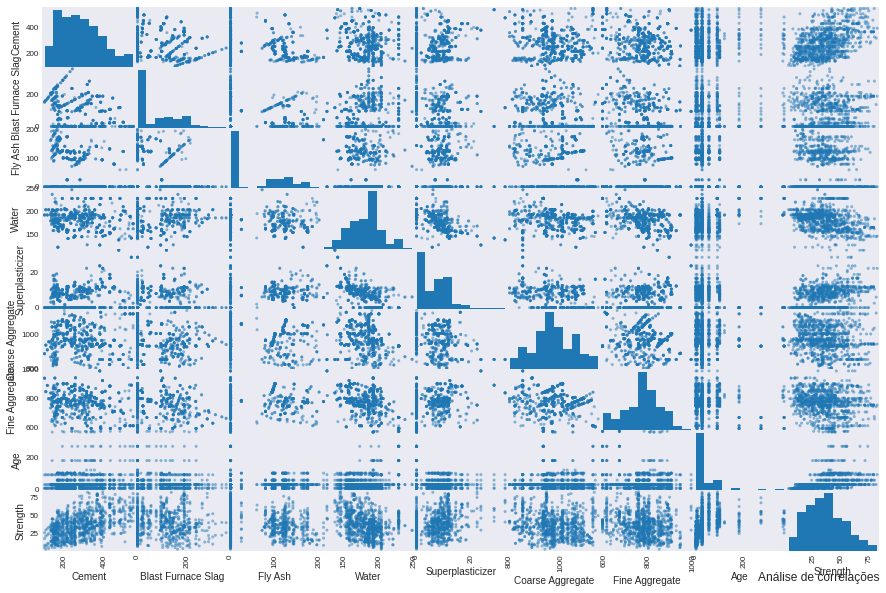

In [ ]:
# Tamanho
plt.figure( figsize=(15, 8) )

# estilo
plt.style.use('seaborn-dark')

columns=['Cement', 'Blast Furnace Slag', 'Fly Ash', 'Water', 'Superplasticizer',
       'Coarse Aggregate', 'Fine Aggregate', 'Age', 'Strength']
pd.plotting.scatter_matrix(df[columns], figsize=(15,10));
plt.savefig('variaveis.png')
plt.annotate('Análise de correlações', xy=(1, -0.50), xycoords='axes fraction', ha='right', fontsize=12);

SkLearn

In [ ]:
#definindo variáveis
df_lm = df
y = df_lm['Strength']
x = df_lm.drop('Strength', axis =1)

In [ ]:
#Instaciando o modelo
from sklearn import linear_model
lm = linear_model.LinearRegression()

In [ ]:
#Divindo as variáveis de treino e teste
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split ( x , y , test_size = 0.3 , random_state= 123)

In [ ]:
#Treinando Modelo
lm.fit(x_train , y_train)

LinearRegression()

In [ ]:
#Gerando predições
pred = lm.predict(x_test)

In [ ]:
#Medindo acurácia
lm.score(x_test, y_test)

0.6011079327652087

In [ ]:
#r quadrado
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, pred)

In [ ]:
rmse = np.sqrt(mse)
rmse

10.259026562177116

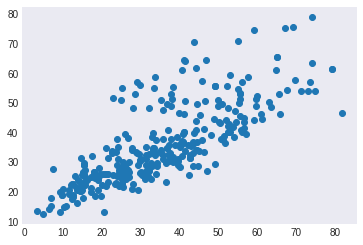

In [ ]:
plt.scatter(y_test, pred)
plt.show()

(array([ 45., 133., 156., 181., 196., 112., 100.,  52.,  36.,  19.]),
 array([ 2.33 , 10.357, 18.384, 26.411, 34.438, 42.465, 50.492, 58.519,
        66.546, 74.573, 82.6  ]),
 <a list of 10 Patch objects>)

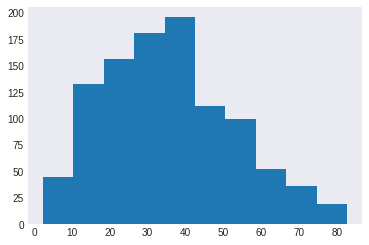

In [ ]:
plt.hist(y)